Project Aim

Tujuan dari proyek ini adalah untuk mengembangkan model machine learning yang mampu memprediksi kemungkinan terjadinya diabetes pada pasien berdasarkan data klinis yang tersedia. Dengan memanfaatkan berbagai indikator kesehatan seperti kadar glukosa darah, tekanan darah, indeks massa tubuh, ketebalan kulit, serta faktor keturunan, model ini diharapkan dapat mengidentifikasi pasien yang berisiko tinggi terkena diabetes tipe 2.

Deteksi dini yang akurat dan andal sangat penting untuk mencegah komplikasi serius yang dapat muncul akibat diabetes, seperti kerusakan saraf, gangguan fungsi ginjal, penyakit jantung, dan gangguan penglihatan. Dengan adanya sistem prediksi yang cepat dan efisien, tenaga medis dapat melakukan intervensi lebih awal, memberikan edukasi kesehatan, serta menyusun rencana perawatan yang tepat guna mengurangi risiko dan dampak jangka panjang bagi pasien.

About the Dataset

Dataset ini berisi catatan medis pasien yang terdiri dari 8 fitur klinis yang sering digunakan untuk menilai risiko diabetes tipe 2. Setiap baris mewakili satu pasien, dan terdapat satu fitur target biner yang menunjukkan apakah pasien terindikasi diabetes atau tidak (Outcome: 1 untuk diabetes, 0 untuk normal).

Dataset ini merupakan dataset Pima Indians Diabetes yang banyak digunakan dalam penelitian kesehatan dan model machine learning untuk prediksi penyakit kronis.

# Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import shap
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Loading

In [28]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
            print(os.path.join(dirname, filename))


/kaggle/input/heart-failure-prediction/heart.csv


In [29]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahmoudhassanmahmoud/diabites-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'diabites-dataset' dataset.
Path to dataset files: /kaggle/input/diabites-dataset


In [30]:
import os
dia_data = pd.read_csv(os.path.join(path, 'diabetes.csv'))
dia_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

<h2>
    Checking null values in the dataset
</h2>

In [31]:
dia_data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<h2>
    Checking Duplicate data
</h2>

In [32]:
dia_data.duplicated().sum()

np.int64(0)

In [33]:
# droping duplicate data
dia_data.drop_duplicates(inplace = True)

In [34]:
dia_data.shape

(768, 9)

<h2>
    Check Missing values in the data
</h2>

In [35]:
print("total no of rows :: {} ".format(len(dia_data)))
print("total no of rows missing Pregnancies :: {} ".format(len(dia_data.loc[dia_data['Pregnancies'] == 0])))
print("total no of rows missing glucose :: {} ".format(len(dia_data.loc[dia_data['Glucose'] == 0])))
print("total no of rows missing bp :: {} ".format(len(dia_data.loc[dia_data['BloodPressure'] == 0])))
print("total no of rows missing insulin :: {} ".format(len(dia_data.loc[dia_data['Insulin'] == 0])))
print("total no of rows missing SkinThickness :: {} ".format(len(dia_data.loc[dia_data['SkinThickness'] == 0])))
print("total no of rows missing DiabetesPedigreeFunction :: {} ".format(len(dia_data.loc[dia_data['DiabetesPedigreeFunction'] == 0])))
print("total no of rows missing bmi :: {} ".format(len(dia_data.loc[dia_data['BMI'] == 0])))
print("total no of rows missing age :: {} ".format(len(dia_data.loc[dia_data['Age'] == 0])))

total no of rows :: 768 
total no of rows missing Pregnancies :: 111 
total no of rows missing glucose :: 5 
total no of rows missing bp :: 35 
total no of rows missing insulin :: 374 
total no of rows missing SkinThickness :: 227 
total no of rows missing DiabetesPedigreeFunction :: 0 
total no of rows missing bmi :: 11 
total no of rows missing age :: 0 


In [36]:
dia_data.iloc[:,:-1].columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

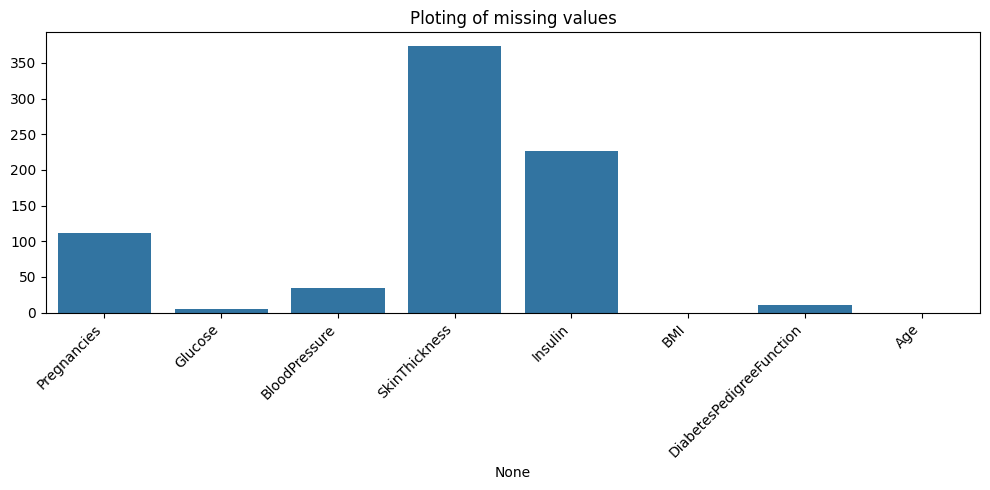

In [37]:
fig = plt.figure(figsize = (10,5))
plt.title("Ploting of missing values")
counts = [
    len(dia_data.loc[dia_data['Pregnancies'] == 0]),
    len(dia_data.loc[dia_data['Glucose'] == 0]),
    len(dia_data.loc[dia_data['BloodPressure'] == 0]),
    len(dia_data.loc[dia_data['Insulin'] == 0]),
    len(dia_data.loc[dia_data['SkinThickness'] == 0]),
    len(dia_data.loc[dia_data['DiabetesPedigreeFunction'] == 0]),
    len(dia_data.loc[dia_data['BMI'] == 0]),
    len(dia_data.loc[dia_data['Age'] == 0])
]
columns = dia_data.iloc[:,:-1].columns
sns.barplot(x=columns, y=counts)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

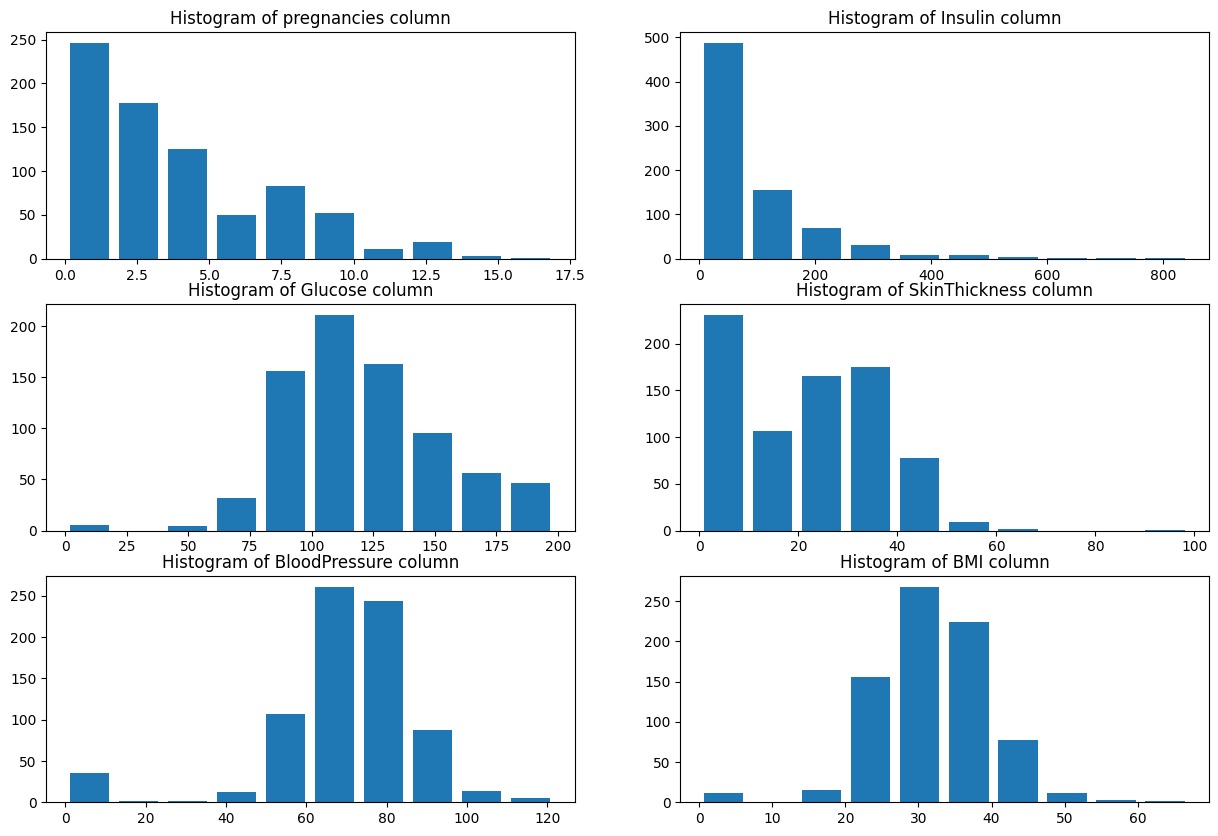

In [38]:
fig , s= plt.subplots(3,2, figsize = (15,10))
s[0][0].set_title("Histogram of pregnancies column")
s[1][0].set_title("Histogram of Glucose column")
s[2][0].set_title("Histogram of BloodPressure column")
s[0][1].set_title("Histogram of Insulin column")
s[1][1].set_title("Histogram of SkinThickness column")
s[2][1].set_title("Histogram of BMI column")

s[0][0].hist(dia_data['Pregnancies'], rwidth = 0.8)
s[1][0].hist(dia_data['Glucose'], rwidth = 0.8)
s[2][0].hist(dia_data['BloodPressure'], rwidth = 0.8)
s[0][1].hist(dia_data['Insulin'] ,rwidth = 0.8)
s[1][1].hist(dia_data['SkinThickness'],rwidth = 0.8)
s[2][1].hist(dia_data['BMI'], rwidth = 0.8)
plt.show()

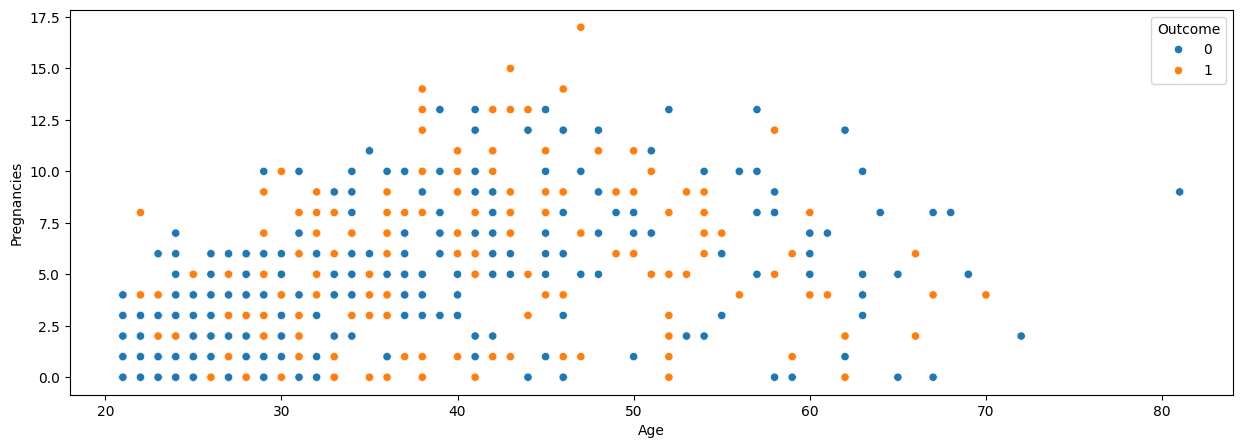

In [39]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= 'Age',y= 'Pregnancies', hue = 'Outcome', data = dia_data)
plt.show()

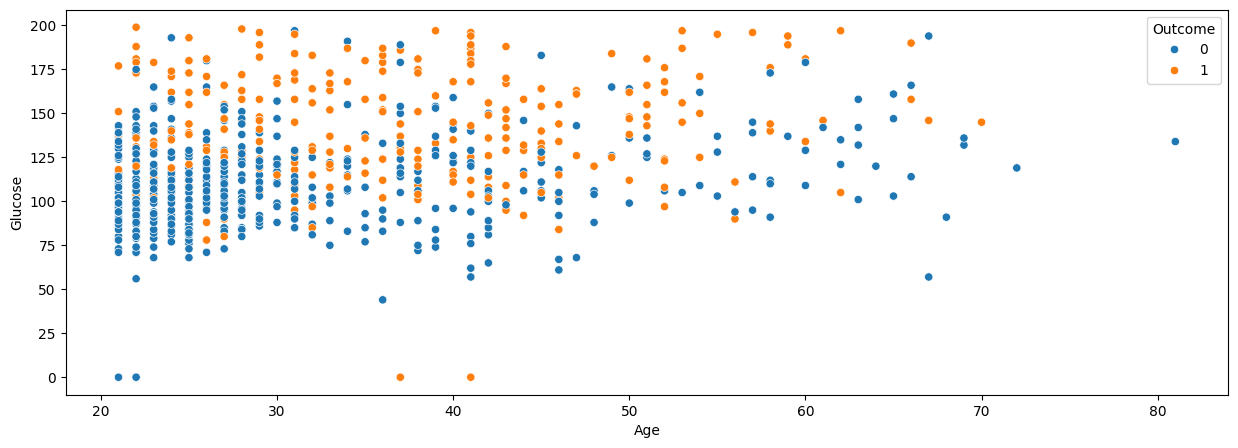

In [40]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= 'Age',y= 'Glucose', hue = 'Outcome', data = dia_data)
plt.show()

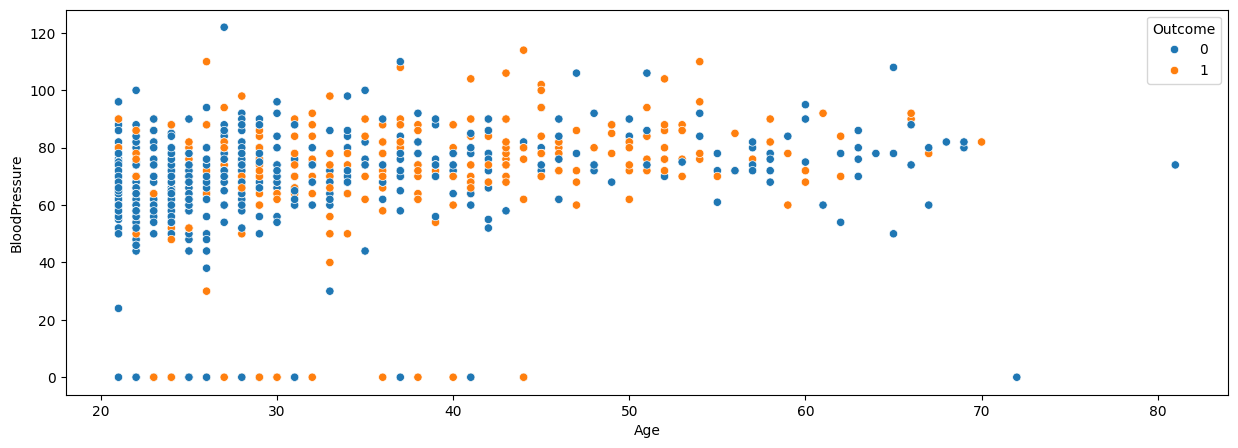

In [41]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= 'Age',y= 'BloodPressure', hue = 'Outcome', data = dia_data)
plt.show()

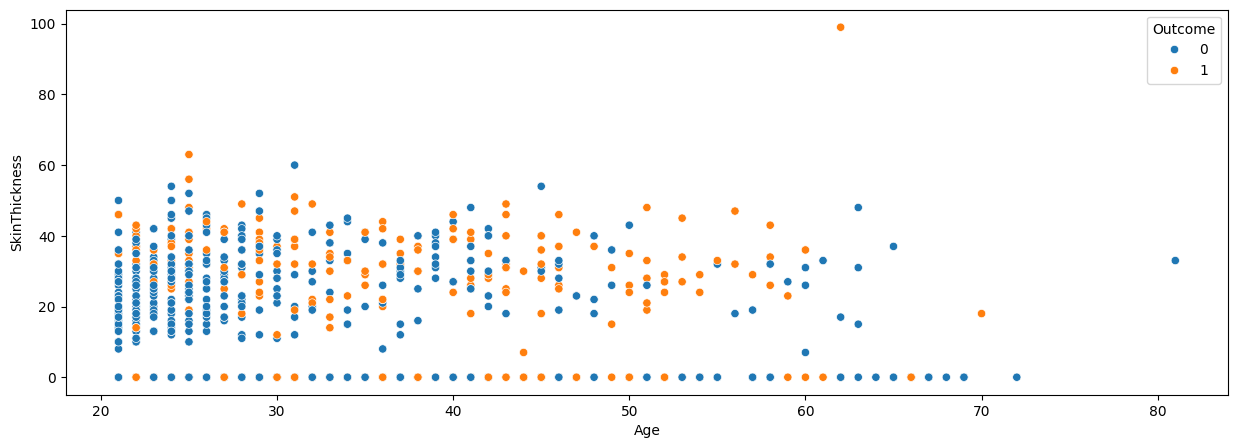

In [42]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= 'Age',y= 'SkinThickness', hue = 'Outcome', data = dia_data)
plt.show()

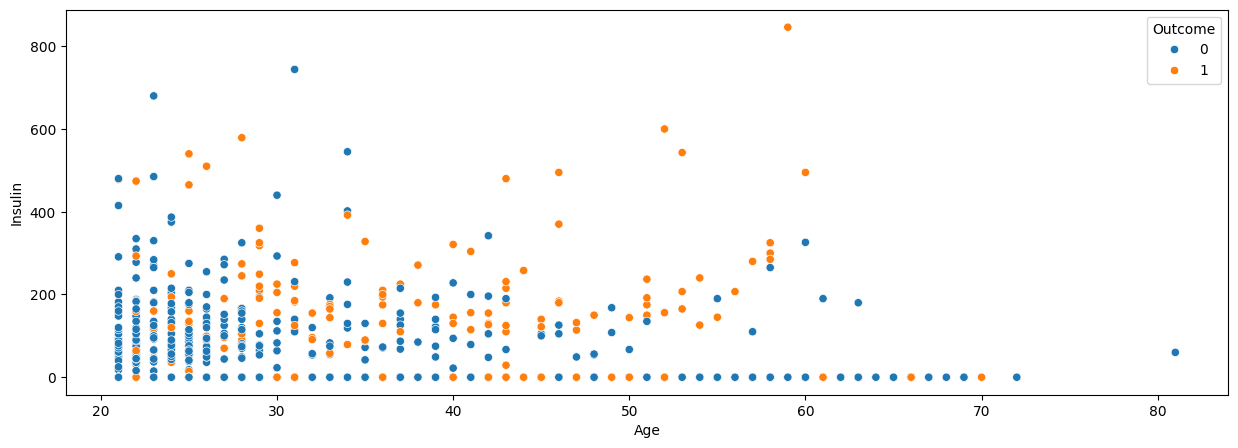

In [43]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= 'Age',y= 'Insulin', hue = 'Outcome', data = dia_data)
plt.show()

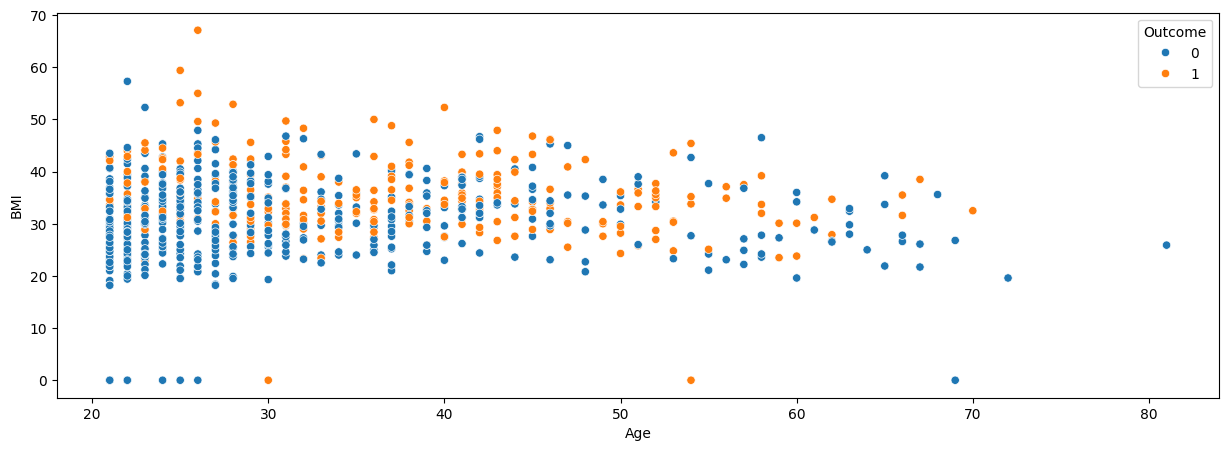

In [44]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= 'Age',y= 'BMI', hue = 'Outcome', data = dia_data)
plt.show()

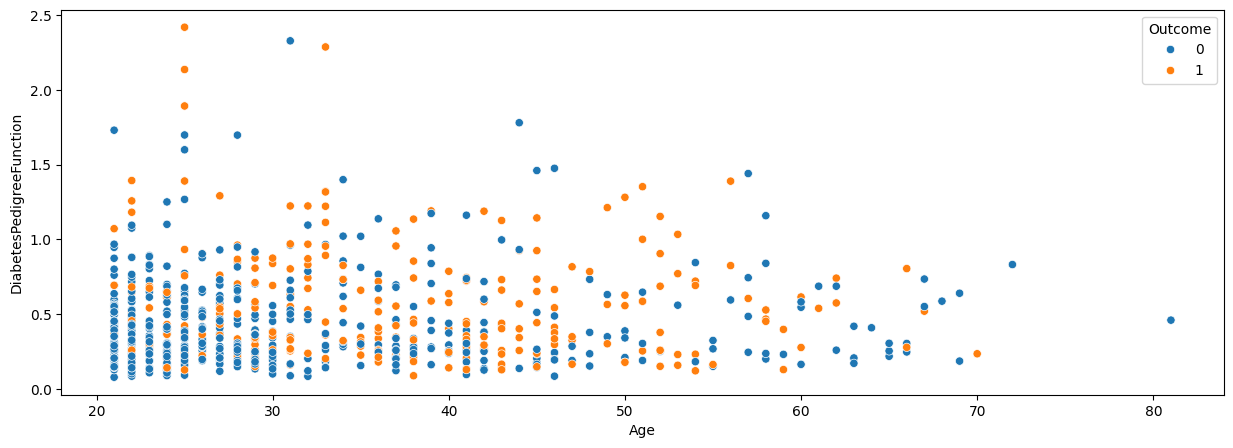

In [45]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= 'Age',y= 'DiabetesPedigreeFunction', hue = 'Outcome', data = dia_data)
plt.show()

# Correlation between each features

In [46]:
corr_data = dia_data.corr() # correlated metrics
top_corr_features = corr_data.index

In [47]:
corr_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [48]:
top_corr_features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<h2>
    Ploting heat map of the correlated data
</h2>

<Axes: >

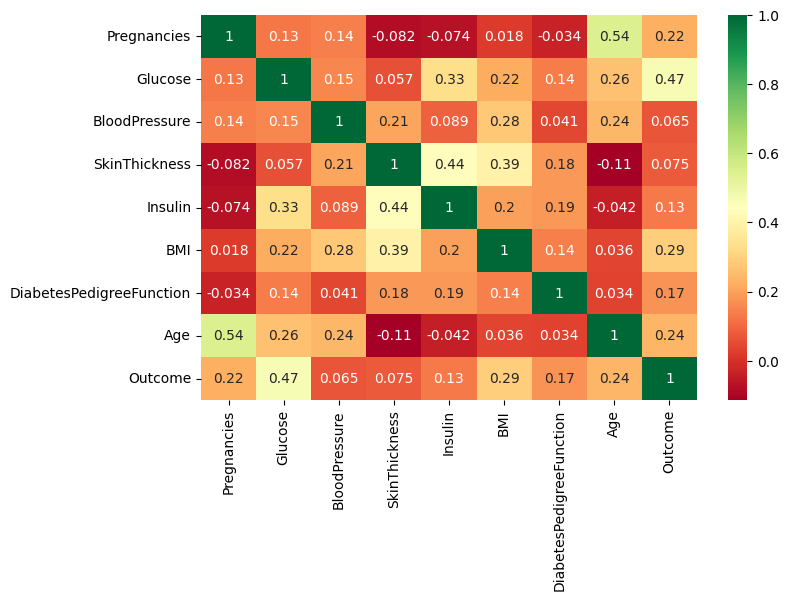

In [49]:
plt.figure(figsize = (8,5))
# annot is used to show each values
# cmap is used for color map on the graph
sns.heatmap(corr_data, annot = True, cmap = 'RdYlGn')

In [50]:
# features set (independent data)
features_column = list(dia_data.iloc[:,:-1].columns)
predicted_column = ['Outcome']
print("features columns :: {} \n predicted columns :: {}".format(features_column,predicted_column))

features columns :: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] 
 predicted columns :: ['Outcome']


In [51]:
X = dia_data[features_column].values
y = dia_data[predicted_column].values

# print("features columns :: {} \n predicted columns :: {}".format(X,y))

In [52]:
X.shape  , y.shape

((768, 8), (768, 1))

<h2>
    Spliting training and testing dataset
</h2>

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [54]:
x_train.shape, y_train.shape  , x_test.shape, y_test.shape
# dia_data.head()

((537, 8), (537, 1), (231, 8), (231, 1))

<h2>
    Filling missing values in training set
</h2>

In [55]:
from sklearn.impute import SimpleImputer
fill_null_value = SimpleImputer(missing_values = 0, strategy = 'mean')

x_train = fill_null_value.fit_transform(x_train)
x_test = fill_null_value.fit_transform(x_test)

## Creating Random Forest model

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10, random_state = 10)
# n_estimators ==> determine the no of decision trees
# random_state ==> It ensures that the splits that you generate are reproducible.
# Eg. when random_state set to an integer, train_test_split will return same results for each execution.
# when random_state set to an None, train_test_split will return different results for each execution.

In [57]:
# train the model
rf.fit( x_train , y_train.ravel())

RandomForestRegressor(n_estimators=10, random_state=10)

In [58]:
# Predicting values from the model
y_pred = rf.predict(x_test)

In [59]:
y_pred = np.array([0 if i < 0.5 else 1 for i in y_pred])

In [60]:
y_pred.shape, y_test.ravel().shape

((231,), (231,))

<h2>
    Checking accuracy score of our model
</h2>

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [62]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)

In [63]:
print("confusion matrix :: {} \n\n Accuracy = {} \n\n classification report :: \n{}".format(cm,acc,class_report))

confusion matrix :: [[121  23]
 [ 32  55]] 

 Accuracy = 0.7619047619047619 

 classification report :: 
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       144
           1       0.71      0.63      0.67        87

    accuracy                           0.76       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



In [65]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, Insulin, SkinThickness, BMI, DiabetesPedigreeFunction, Age):
    data = np.array([[Pregnancies, Glucose, BloodPressure, Insulin, SkinThickness, BMI, DiabetesPedigreeFunction, Age]])
    data = fill_null_value.transform(data)
    pred = rf.predict(data)[0]
    pred = 1 if pred >= 0.5 else 0
    return "Diabetes" if pred == 1 else "Normal"


In [66]:
import gradio as gr

with gr.Blocks() as demo:
    gr.Markdown("# Prediksi Diabetes Menggunakan Random Forest")

    pregnancies = gr.Number(label="Pregnancies")
    glucose = gr.Number(label="Glucose")
    bloodpressure = gr.Number(label="Blood Pressure")
    insulin = gr.Number(label="Insulin")
    skin = gr.Number(label="Skin Thickness")
    bmi = gr.Number(label="BMI")
    dpf = gr.Number(label="Diabetes Pedigree Function")
    age = gr.Number(label="Age")

    output = gr.Textbox(label="Hasil Prediksi")

    predict_btn = gr.Button("Prediksi")

    predict_btn.click(
        predict_diabetes,
        inputs=[pregnancies, glucose, bloodpressure, insulin, skin, bmi, dpf, age],
        outputs=output
    )

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c40850412e6d2063c9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
